In [1]:
#Importing all the necessary laibraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [3]:
#calling the data set
df=pd.read_csv("C:/Users/samir/Downloads/Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
#checking the null values
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

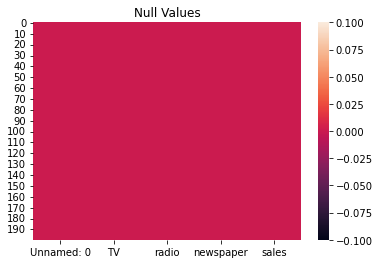

In [5]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [6]:
#Checking the outliers 
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [7]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


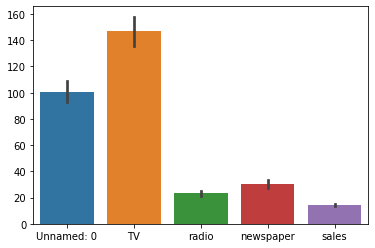

In [9]:
sns.barplot(data=df)
plt.show()

In [11]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


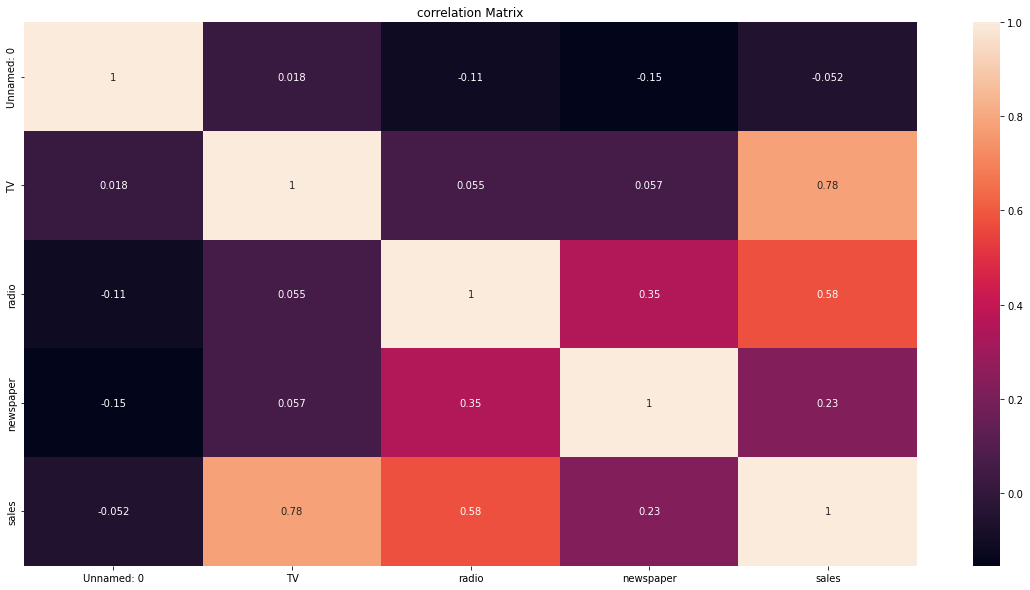

In [12]:
corr_mat = df.corr()
plt.figure(figsize=[20,10])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show()

<AxesSubplot:xlabel='Unnamed: 0'>

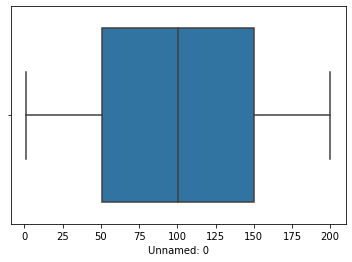

In [13]:
#Outliers checking 
sns.boxplot('Unnamed: 0',data=df)

<AxesSubplot:xlabel='TV'>

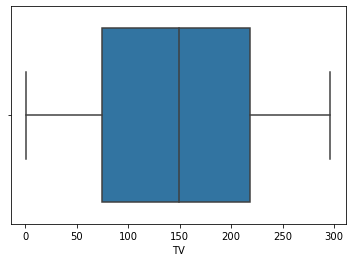

In [15]:
sns.boxplot('TV',data =df)

<AxesSubplot:xlabel='radio'>

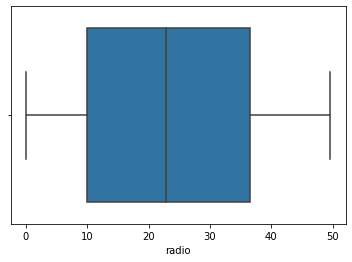

In [16]:
sns.boxplot('radio',data =df)

<AxesSubplot:xlabel='newspaper'>

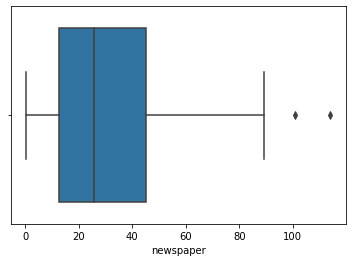

In [17]:
sns.boxplot('newspaper',data =df)

<AxesSubplot:xlabel='sales'>

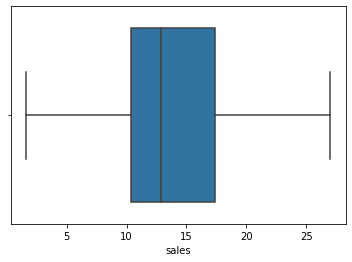

In [18]:
sns.boxplot('sales',data =df)

In [19]:
#REMOVING OUTLIERS
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(200, 5)

In [20]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))


In [35]:
#Checking whether how much outliers are still there
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [23]:
#Checking the skewness of data
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

# Checking skewness through Normal Distribution Curve

<AxesSubplot:xlabel='Unnamed: 0', ylabel='Density'>

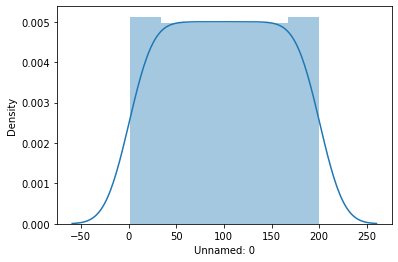

In [25]:
sns.distplot(df["Unnamed: 0"])

<AxesSubplot:xlabel='TV', ylabel='Density'>

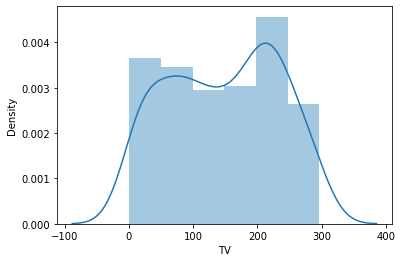

In [26]:
sns.distplot(df["TV"])

<AxesSubplot:xlabel='radio', ylabel='Density'>

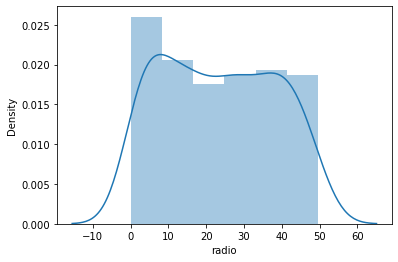

In [27]:
sns.distplot(df["radio"])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

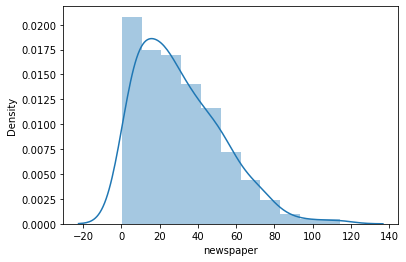

In [28]:
sns.distplot(df["newspaper"])

<AxesSubplot:xlabel='sales', ylabel='Density'>

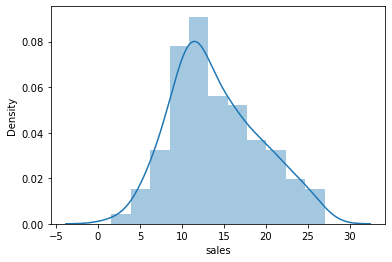

In [29]:
sns.distplot(df["sales"])

In [40]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [42]:
#Spliting df into x and y
x=df.drop('sales',axis=1)
y=df['sales']

In [43]:
#Using train test split
x_train,x_test, y_train,y_test =train_test_split(x,y,train_size=0.7,random_state=1)

In [44]:
x_train

,Unnamed: 0,TV,radio,newspaper
116,117,139.2,14.3,25.6
67,68,139.3,14.5,10.2
78,79,5.4,29.9,9.4
42,43,293.6,27.7,1.8
17,18,281.4,39.6,55.8
...,...,...,...,...
133,134,219.8,33.5,45.1
137,138,273.7,28.9,59.7
72,73,26.8,33.0,19.3
140,141,73.4,17.0,12.9


In [45]:
y_train

116    12.2
67     13.4
78      5.3
42     20.7
17     24.4
       ... 
133    19.6
137    20.8
72      8.8
140    10.9
37     14.7
Name: sales, Length: 140, dtype: float64

In [46]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [48]:
predict = regression.predict(x_test)
predict

array([21.66726472, 16.44886585,  7.70162782, 17.91693951, 18.6598302 ,
       23.77686855, 16.28148316, 13.45215658,  9.16134283, 17.31440772,
       14.42914135,  9.85120603, 17.27607345, 16.62782623, 15.08911406,
       15.49601481, 12.42628103, 17.33599227, 11.03927674, 18.06273193,
        9.36111799, 12.7997845 ,  8.74017775, 10.47426246, 11.39043595,
       15.01903559,  9.7479584 , 19.45620185, 18.18124577, 17.21163034,
       21.57046641, 14.69384162, 16.25255007, 12.36123532, 19.96129204,
       15.36852746, 13.99610286, 10.08100899, 20.9223882 ,  7.42982649,
        3.66996929,  7.27759842,  5.98440814, 18.4246142 ,  8.3232281 ,
       14.11983162, 14.93410073, 20.36600912, 20.551861  , 19.54783442,
       24.10207685, 14.84753143,  6.71277509, 19.78115551, 18.95031714,
       12.50189261, 14.19083579,  6.10782886, 15.35859061,  9.56315359])

In [49]:
regression.score(x_test, y_test)

0.9225191550357024